In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

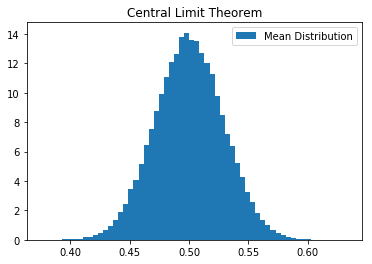

In [20]:
list1 = []
for i in range(1,100000):
    s = np.random.random(100)
    x,y = s.sum(),len(s)
    x=x/y
    list1.append(x)
    
plt.hist(list1,60,normed=True,label='Mean Distribution')
plt.title("Central Limit Theorem")
plt.legend()
plt.show()

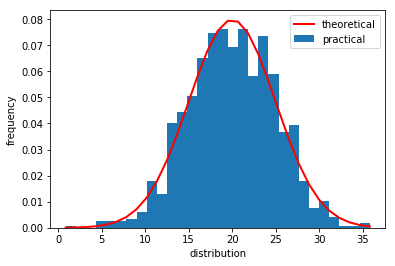

In [5]:
mu,sigma = 20,5

s = np.random.normal(mu,sigma,1000)                                #generate 1000 random normal variables for histogram
count,bins,ignored = plt.hist(s,30,normed=True,label='practical')  #generate histogram


a = plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *                 #generate gaussian pdf
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r',label='theoretical')


plt.xlabel('distribution')
plt.ylabel('frequency')
plt.legend()
plt.show()

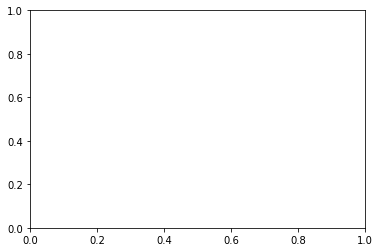

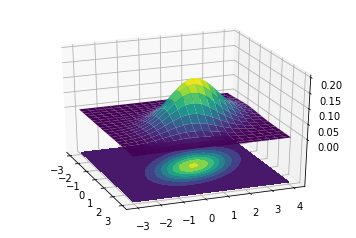

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

In [69]:

list1 = []
list2 = []
list3 = []
list4 = []

def randomNumbers():
    list1 = np.random.random(200)
    mean = list1.mean()
    var = list1.var()
    return(mean,var)

def gauss(m,v,x):
    x = float (x)
    return (1/(np.sqrt(2*np.pi*v))) * (np.exp(-(x-m)**2/2*v))

number = int (input("Enter the number of classes"))

print("Enter the prior probabilities")
for i in range(number):
    list2.append(input())

number1 = int (input("Enter the number of sample points"))    
print("Enter the Sample Values")
for i in range(number1):
    list4.append(int (input()))
    
for i in range(number1):
    m,v = randomNumbers()
    num = gauss(m,v,list4[i])
    list3.append(num)

print(list2,list3)

i  = list3.index(max(list3))
print(i+1)    

Enter the number of classes2
Enter the prior probabilities
1
2
Enter the number of sample points1
Enter the Sample Values
11
['1', '2'] [0.012731914176442607]
1


In [3]:
X = np.random.normal(5,np.sqrt(20),200)      #Generate 200 samples N(5,20)
Y = np.random.normal(10,np.sqrt(15),200)      #Generate 200 samples N(10,15)
Z = np.random.normal(20,np.sqrt(25),200)      #Generate 200 samples N(20,25)

mean_x = np.mean(X)                           #Calculate mean for X
mean_y = np.mean(Y)                          #Calculate mean for Y
mean_z = np.mean(Z)                          #Calculate mean for Z

var_x = np.var(X)                             #Calculate variance for X
var_y = np.var(Y)                             #Calculate variance for Y
var_z = np.var(Z)                             #Calculate variance for Y

Test = np.random.uniform(0,15,40)           #Generate 40 samples between [5,20]



#Apriori Probabilities
P1 = 0.5
P2 = 0.5
P3 = 0.5

manual_label = []

#Manual Classification using Naive Bayes
for i in range(Test.size):
    p1 = (1/np.sqrt(2*np.pi*var_x)) * np.exp(-np.power(Test[i]-mean_x,2)/2*var_x)
    p2 = (1/np.sqrt(2*np.pi*var_y)) * np.exp(-np.power(Test[i]-mean_y,2)/2*var_y)
    p3 = (1/np.sqrt(2*np.pi*var_z)) * np.exp(-np.power(Test[i]-mean_y,2)/2*var_z)
    if (p1*P1)>(p2*P2) and (p1*P1)>(p3*P3):
        manual_label.insert(i,1)
    elif (p2*P2)>(p1*P1) and (p2*P2)>(p3*P3) :
        manual_label.insert(i,2)
    elif (p3*P3)>(p1*P1) and (p3*P3)>(p2*P2) :
        manual_label.insert(i,3)

#End of classification

#Classification using inbuilt Naive Bayes

X1 = np.matrix(X)
Y1 = np.matrix(Y)
Z1 = np.matrix(Z)

Train_data = np.concatenate((X1,Y1,Z1))

#Training data generated
Train_data = np.reshape(Train_data,(-1,1))

label = []
for i in range(len(X)):
    label.insert(i,1)
    
for j in range(len(Y)):
    label.insert(j+len(X),2)

for k in range(len(Z)):
    label.insert(k+len(X),3)

clf = GaussianNB()
clf.class_prior_ = [0.5,0.5,0.5]
clf.fit(Train_data,label)

count=0

auto_label = []
for i in range(Test.size):
    x = clf.predict(Test[i])
    auto_label.insert(i,x)
    
count=0
for i in range(len(auto_label)):
    if auto_label[i] == manual_label[i]:
        count = count + 1

classified = (count/len(auto_label))*100

print("Classified:",classified)
print("Misclassified:",100-classified)


Classified: 50.0
Misclassified: 50.0


In [95]:
iris = datasets.load_iris()


data1 = iris.data[0:10]
label1 = iris.target[0:10]

data2 = iris.data[10:20]
label2 = iris.target[10:20]

data3 = iris.data[20:30]
label3 = iris.target[20:30]

data4 = iris.data[30:40]
label4 = iris.target[30:40]

data5 = iris.data[40:50]
label5 = iris.target[40:50]

data5 = iris.data[50:60]
label5 = iris.target[50:60]

data6 = iris.data[60:70]
label6 = iris.target[60:69]

data7 = iris.data[70:79]
label7 = iris.target[70:79]

data8 = iris.data[80:89]
label8 = iris.target[80:89]

data9 = iris.data[90:99]
label9 = iris.target[90:99]

data10 = iris.data[100:109]
label10 = iris.target[100:109]

data11 = iris.data[110:119]
label11 = iris.target[110:119]

data12 = iris.data[120:129]
label12 = iris.target[120:129]

data13 = iris.data[130:139]
label13 = iris.target[130:139]

data14 = iris.data[140:149]
label14 = iris.target[140:149]


Train_data = [data1,data2,data3,data4,data6,data7,data8,data9,data11,data12,data13,data14]
Train_data = np.reshape(Train_data,(-4,4))
label = [label1,label2,label3,label4,label6,label7,label8,label9,label11,label12,label13,label14]
label = np.reshape(label,(-1,1))


Test_data = [data5,data10,data14]
Test_data = np.reshape(Test_data,(-4,4))
label_test = [label5,label10,label14]

label_test = np.array(label_test)
label_test = np.matrix(label_test)
label_test = np.reshape(label_test,(-1,1))

model = GaussianNB()
predict = model.fit(Train_data,label.flatten())
est_target = predict.predict(Test_data)

count1=0
for i in range(len(est_target)):
    if est_target[i]!=label_test[i]:
        count1 = count1 + 1
    
#print(count1)


Train_data = [data2,data3,data4,data5,data7,data8,data9,data10,data12,data13,data14]
Train_data = np.reshape(Train_data,(-4,4))
label = [label2,label3,label4,label5,label7,label8,label9,label10,label12,label13,label14]
label = np.reshape(label,(-1,1))


Test_data = [data1,data6,data11]
Test_data = np.reshape(Test_data,(-4,4))
label_test = [label1,label6,label11]

label_test = np.array(label_test)
label_test = np.matrix(label_test)
label_test = np.reshape(label_test,(-1,1))

model = GaussianNB()
predict = model.fit(Train_data,label.flatten())
est_target = predict.predict(Test_data)

count2=0
for i in range(len(est_target)):
    if est_target[i]!=label_test[i]:
        count2 = count2 + 1

#print(count2)



Train_data = [data1,data2,data4,data5,data6,data7,data9,data10,data11,data12,data13]
Train_data = np.reshape(Train_data,(-4,4))
label = [label2,label3,label4,label5,label7,label8,label9,label10,label12,label13,label14]
label = np.reshape(label,(-1,1))


Test_data = [data3,data8,data13]
Test_data = np.reshape(Test_data,(-4,4))
label_test = [label3,label8,label13]

label_test = np.array(label_test)
label_test = np.matrix(label_test)
label_test = np.reshape(label_test,(-1,1))

model = GaussianNB()
predict = model.fit(Train_data,label.flatten())
est_target = predict.predict(Test_data)

count3=0
for i in range(len(est_target)):
    if est_target[i]!=label_test[i]:
        count3 = count3 + 1

#print(count3)


Train_data = [data1,data2,data3,data5,data6,data7,data8,data10,data11,data13,data14]
Train_data = np.reshape(Train_data,(-4,4))
label = [label1,label2,label3,label5,label6,label7,label8,label10,label11,label13,label14]
label = np.reshape(label,(-1,1))


Test_data = [data4,data9,data12]
Test_data = np.reshape(Test_data,(-4,4))
label_test = [label4,label9,label12]

label_test = np.array(label_test)
label_test = np.matrix(label_test)
label_test = np.reshape(label_test,(-1,1))

model = GaussianNB()
predict = model.fit(Train_data,label.flatten())
est_target = predict.predict(Test_data)

count4=0
for i in range(len(est_target)):
    if est_target[i]!=label_test[i]:
        count4 = count4 + 1

Train_data = [data1,data2,data3,data5,data6,data7,data8,data10,data11,data13,data12]
Train_data = np.reshape(Train_data,(-4,4))
label = [label1,label2,label3,label5,label6,label7,label8,label10,label11,label13,label12]
label = np.reshape(label,(-1,1))
print(Train_data.shape)


Test_data = [data4,data9,data14]
Test_data = np.reshape(Test_data,(-4,4))
label_test = [label4,label9,label14]

label_test = np.array(label_test)
label_test = np.matrix(label_test)
label_test = np.reshape(label_test,(-1,1))

model = GaussianNB()
predict = model.fit(Train_data,label.flatten())
est_target = predict.predict(Test_data)

count5=0
for i in range(len(est_target)):
    if est_target[i]!=label_test[i]:
        count5 = count5 + 1

misclassified = (count1 + count2 + count3 + count4 + count5)
print("The average misclassification is",(misclassified/30)*100,"%")

(99, 4)
The average misclassification is 13.333333333333334 %


In [1]:
def assign_label(Train_data,Test_data,Train_label,Test_label,k):
    
    NNeigbour_wgt = []
    New_label = []

    missclassified = 0
    for i in range(len(Test_data)):
        NNeigbour_wgt = []
        New_label = []
        count0 = 0
        count1 = 0
        count2 = 0
        for j in range(len(Train_data)):
            dist = np.linalg.norm(Train_data[j]-Test_data[i])
            NNeigbour_wgt.insert(j,[dist,Train_label[j]])

        NNeigbour_wgt = np.sort(NNeigbour_wgt,0)
        for l in range(k):
            if NNeigbour_wgt[l,1] == 0:
                count0 = count0 + 1
            elif NNeigbour_wgt[l,1] == 1:
                count1 = count1 + 1
            elif NNeigbour_wgt[l,1] == 2:
                count2 = count2 + 1

        if count0>count1 and count0>count2:
            new_label = 0
        elif count1>count0 and count1>count2:   
            new_label = 1
        elif count2>count0 and count2>count1:   
            new_label = 2

        if new_label != Test_label[i]:
            missclassified = missclassified + 1
            #print(Test_data[i],Test_label[i],new_label)

    return(missclassified)
    #print(missclassified)

    
    



iris = datasets.load_iris()

dataset = iris.data
label = iris.target

#Preparation of Training data
data1 = dataset[0:40]
label1 = label[0:40]
data2 = dataset[50:90]
label2 = label[50:90]
data3 = dataset[100:140]
label3 = label[100:140]

Train_data = np.concatenate([data1,data2,data3])       #Training data
Train_label = np.concatenate([label1,label2,label3])   #Training data label

#Preparation of Testing data
data4 = dataset[40:50]
label4 = label[40:50]
data5 = dataset[90:100]
label5 = label[90:100]
data6 = dataset[140:150]
label6 = label[140:150]

Test_data = np.concatenate([data4,data5,data6])        #Testing data
Test_label = np.concatenate([label4,label5,label6])    #Testing data label

k = 1
temp = 0

temp = temp + assign_label(Train_data,Test_data,Train_label,Test_label,k)

#Preparation of Training data
data1 = dataset[10:50]
label1 = label[10:50]
data2 = dataset[60:100]
label2 = label[60:100]
data3 = dataset[110:150]
label3 = label[110:150]

Train_data = np.concatenate([data1,data2,data3])       #Training data
Train_label = np.concatenate([label1,label2,label3])   #Training data label

#Preparation of Testing data
data4 = dataset[0:10]
label4 = label[0:10]
data5 = dataset[50:60]
label5 = label[50:60]
data6 = dataset[100:110]
label6 = label[100:110]

Test_data = np.concatenate([data4,data5,data6])        #Testing data
Test_label = np.concatenate([label4,label5,label6])    #Testing data label

temp1 = assign_label(Train_data,Test_data,Train_label,Test_label,k)


#Preparation of Training data
data1 = dataset[10:50]
label1 = label[10:50]
data2 = dataset[60:100]
label2 = label[60:100]
data3 = dataset[110:150]
label3 = label[110:150]

Train_data = np.concatenate([data1,data2,data3])       #Training data
Train_label = np.concatenate([label1,label2,label3])   #Training data label

#Preparation of Testing data
data4 = dataset[0:10]
label4 = label[0:10]
data5 = dataset[50:60]
label5 = label[50:60]
data6 = dataset[100:110]
label6 = label[100:110]

Test_data = np.concatenate([data4,data5,data6])        #Testing data
Test_label = np.concatenate([label4,label5,label6])    #Testing data label



NameError: name 'datasets' is not defined

In [ ]:

(NNeigbour_wgt)